The stratify parameter asks whether you want to retain the same proportion of classes in the train and test sets that are found in the entire original dataset.

For example, if there are 100 observations in the entire original dataset of which 80 are class a and 20 are class b and you set stratify = True, with a .7 : .3 train-test split, you will get a training set with 56 examples of class a and 14 examples of class b.

In [5]:
from sklearn.datasets import make_blobs
from pandas import DataFrame
import pandas as pd
from sklearn.preprocessing import StandardScaler
# generate a classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=1, cluster_std=3)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,random_state=0,stratify=y)

# 4

Limitations of Logistic Regression

Two-Class Problems. Logistic regression is intended for two-class or binary classification problems. It can be extended for multi-class classification, but is rarely used for this purpose.

Unstable With Well Separated Classes. Logistic regression can become unstable when the classes are well separated.

Unstable With Few Examples. Logistic regression can become unstable when there are few examples from which to estimate the parameters.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [7]:
lda.explained_variance_ratio_


array([0.68673918, 0.31326082])

[]

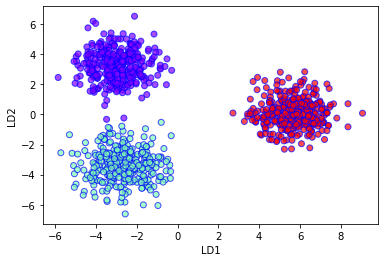

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.plot()

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_lda, y, random_state=1,stratify=y)

In [14]:
xtrain

array([[-2.285493  , -3.16487291],
       [-4.23998625,  2.30117267],
       [-2.67714767, -3.4192915 ],
       ...,
       [-3.92939768,  2.39069549],
       [ 5.10245585,  0.94372136],
       [-2.8501456 ,  1.86979974]])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(xtrain)
# Apply transform to both the training set and the test set.
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [16]:
xtrain

array([[-0.55403201, -1.08874915],
       [-1.02680536,  0.80699818],
       [-0.64876956, -1.17698722],
       ...,
       [-0.95167693,  0.8380467 ],
       [ 1.23304261,  0.33620359],
       [-0.69061611,  0.65738836]])

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
y_pred = dt.predict(xtest)
y_pred

array([2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1,
       2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2,
       0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1,
       2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2,
       0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1,
       0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 2, 0])

In [28]:
import numpy as np
ytest = np.asarray(ytest)
misclassified = np.where(ytest != dt.predict(xtest))
misclassified#means , here nothing is misclassified

(array([], dtype=int64),)

In [29]:
print(y_pred[101])#predicted result 
print(ytest[101])#actual result

print(y_pred[157])#predicted result 
print(ytest[157])#actual result


0
0
2
2
